In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/minsu/Desktop/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


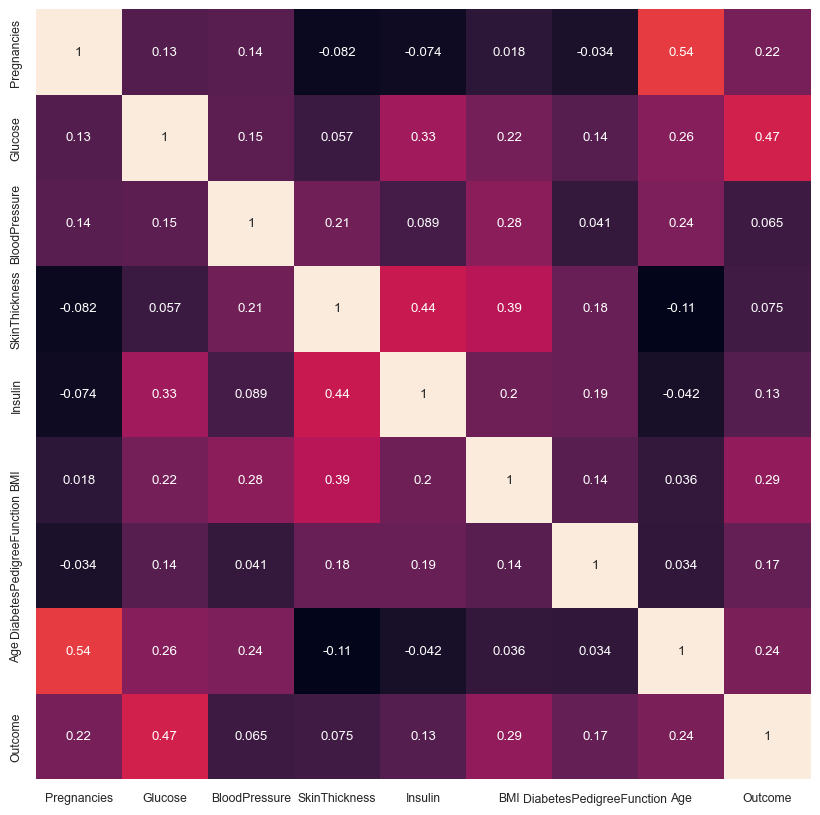

In [10]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df.drop(['BMI', 'Outcome'], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [18]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lg = model.predict(X_test)

print('MSE -> ', mean_squared_error(y_pred_lg, y_test))

MSE ->  51.57886634430024


In [28]:
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
print('MSE -> ', mse_np(y_pred_lg, y_test))

MSE ->  51.57886634430024


In [30]:
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('MSE -> ', mse(y_pred_lg, y_test))

MSE ->  51.57886634430022


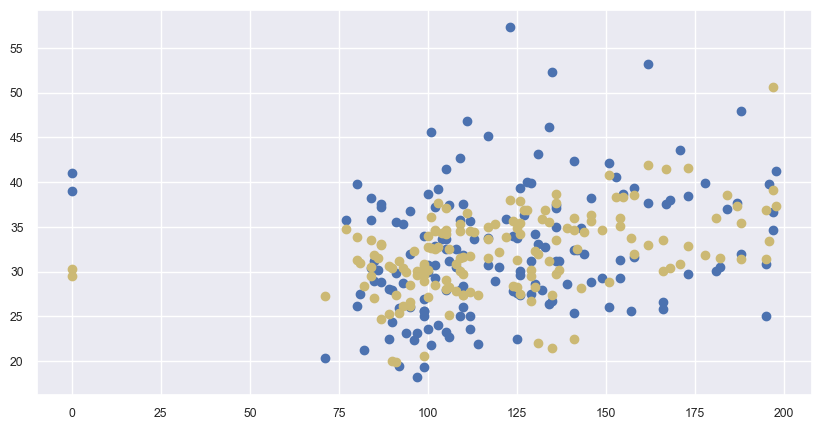

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], y_pred_lg, c = 'y', label='y_pred_lg')
plt.show()

In [40]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print("평균제곱근오차", mean_squared_error(dy_preds, y_test))

평균제곱근오차 83.95422077922079


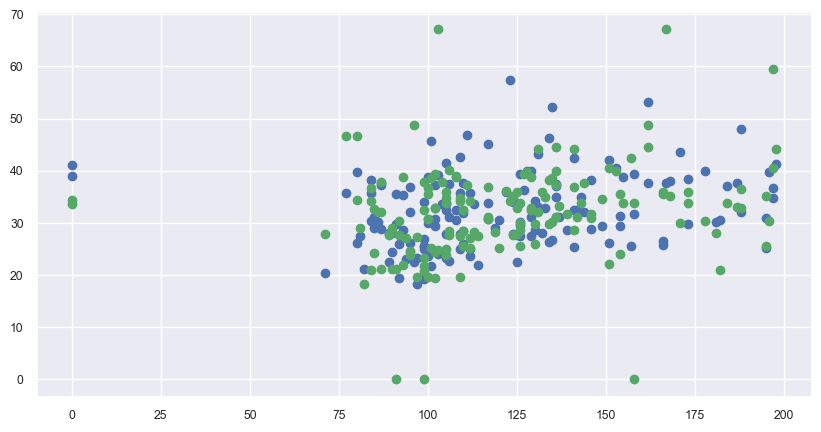

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], dy_preds, c='g', label='dy_preds')
plt.show()

In [46]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 49.07251213401918


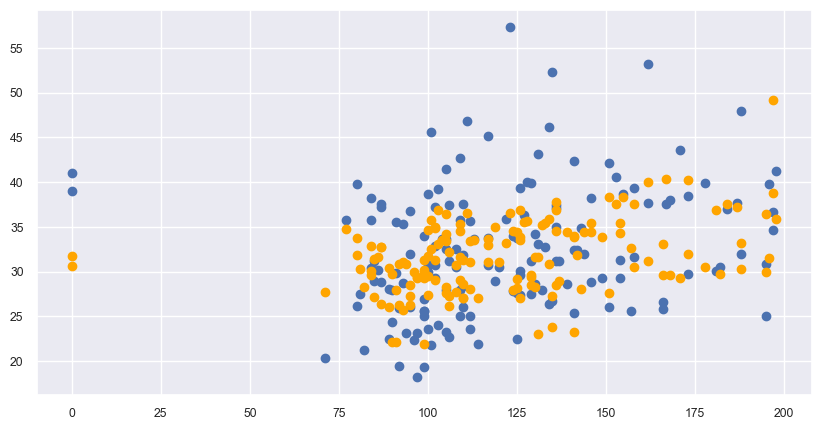

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], ry_preds, c = 'orange', label='ry_preds')

plt.show()